In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
involvement_columns = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 
                           'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML', 
                           'Funding', 'Application-Oriented', 'Number of Members', 
                           'Academic Collaborations', 'System Maturity', 'Demos', 'Industrial Collaborations']

In [6]:
industry_cols = ['Security', 'Humanities', 'Nat. Sci', 'Health', 'AI Ethics', 'Big Data', 'Robotics', 'Documents', 'Multimedia', 'NLP', 'KRR', 'Graphs', 'DL/ML']

In [7]:
comp_cols = ['Number of Members', 'Application-Oriented', 'Academic Collaborations', 
                      'System Maturity', 'Demos', 'Industrial Collaborations']

In [8]:
"""
    Loads and preprocesses the team activity data from a CSV file.

    Parameters:
    - file_path (str): The path to the CSV file containing the team activity data.

    Returns:
    - df (DataFrame): A preprocessed DataFrame with involvement levels converted to numerical values.
    """
# Load and preprocess the data

def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path, index_col=0).transpose()
    weights = {'Strong': 3, 'Good': 2, 'Average': 1, 'None': 0}

    
   
    for column in involvement_columns:
        if column in data.columns:
            data[column] = data[column].map(weights).fillna(0)
    return data

In [9]:
# Path to the CSV file
from sklearn.preprocessing import StandardScaler 
filepath = 'data/team_stats.csv'

# Load and preprocess the data
df = load_and_preprocess_data(filepath)

In [79]:
df.head()

Field,Security,Humanities,Nat. Sci,Health,AI Ethics,Big Data,Robotics,Documents,Multimedia,NLP,KRR,Graphs,DL/ML,Funding,Application-Oriented,Number of Members,Academic Collaborations,System Maturity,Demos,Industrial Collaborations
DICE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,3.0,2.0,2.0,2.0,1.0,2.0,1,2.0,2.0,2.0,1.0
MagICL,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,3.0,3.0,3,3.0,3.0,3.0,3.0
BioHIT,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,3.0,2.0,3.0,3.0,2,2.0,2.0,2.0,1.0
CAKT,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,3.0,3.0,3.0,2,3.0,3.0,3.0,3.0
CER,1.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,2.0,2.0,3,0.0,3.0,3.0,0.0


In [10]:
def calculate_pairwise_similarity(data):

    
 
    sim_matrix = np.zeros((len(data), len(data)))
    
   
    scoring_matrix = np.array([
        [0, 1, 2, 3],  # None
        [1, 2, 3, 4],  # Average
        [2, 3, 4, 5],  # Good
        [3, 4, 5, 6]   # Strong
    ])
    
    # Map involvement levels to indices
    involvement_index = {'None': 0, 'Average': 1, 'Good': 2, 'Strong': 3}
    
    # Reverse the numerical mapping for correct index lookups
    reverse_weights = {0: 'None', 1: 'Average', 2: 'Good', 3: 'Strong'}
    
    # Calculate pairwise similarity scores
    for i in range(len(data)):
        for j in range(len(data)):
            if i != j:
                similarity_score = 0
                for col in industry_cols:
                    level_i = reverse_weights[data[col].iloc[i]]
                    level_j = reverse_weights[data[col].iloc[j]]
                    index_i = involvement_index[level_i]
                    index_j = involvement_index[level_j]
                    similarity_score += scoring_matrix[index_i][index_j]
                sim_matrix[i][j] = similarity_score
    
    return sim_matrix

In [11]:
similarity_matrix = calculate_pairwise_similarity(df)
similarity_matrix

array([[ 0., 21., 26., 28., 27., 21., 22., 21., 19., 22., 20., 23., 21.,
        23.],
       [21.,  0., 21., 23., 22., 16., 17., 16., 14., 17., 15., 18., 16.,
        18.],
       [26., 21.,  0., 28., 27., 21., 22., 21., 19., 22., 20., 23., 21.,
        23.],
       [28., 23., 28.,  0., 29., 23., 24., 23., 21., 24., 22., 25., 23.,
        25.],
       [27., 22., 27., 29.,  0., 22., 23., 22., 20., 23., 21., 24., 22.,
        24.],
       [21., 16., 21., 23., 22.,  0., 17., 16., 14., 17., 15., 18., 16.,
        18.],
       [22., 17., 22., 24., 23., 17.,  0., 17., 15., 18., 16., 19., 17.,
        19.],
       [21., 16., 21., 23., 22., 16., 17.,  0., 14., 17., 15., 18., 16.,
        18.],
       [19., 14., 19., 21., 20., 14., 15., 14.,  0., 15., 13., 16., 14.,
        16.],
       [22., 17., 22., 24., 23., 17., 18., 17., 15.,  0., 16., 19., 17.,
        19.],
       [20., 15., 20., 22., 21., 15., 16., 15., 13., 16.,  0., 17., 15.,
        17.],
       [23., 18., 23., 25., 24., 18., 19., 

In [12]:
def calculate_complementary_scores(data):
    """
    Calculates a pairwise complementary score matrix for the teams based on their complementary factors.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the team activity data.
    
    Returns:
    - complementary_matrix (ndarray): A 2D NumPy array representing the pairwise complementary scores between teams.
    """

   
    data = data[comp_cols]
    

    print(f"Shape of the filtered data: {data.shape}")
    
 
    comp_matrix = np.zeros((len(data), len(data)))
    
    # Calculate pairwise complementary scores
    for i in range(len(data)):
        for j in range(len(data)):
            if i != j:
                complementary_score = 0
                for col in comp_cols:
                    # Sum the absolute differences in complementary factors
                    complementary_score += abs(data[col].iloc[i] - data[col].iloc[j])
                comp_matrix[i][j] = complementary_score
    
    # Invert the scores to make them comparable with similarity scores (lower means more complementary)
    max_score = np.max(comp_matrix)
    comp_matrix = max_score - comp_matrix
    
    return comp_matrix

In [13]:
complementary_matrix = calculate_complementary_scores(df)
complementary_matrix

Shape of the filtered data: (14, 6)


array([[17.,  9., 15., 10., 10., 13., 12., 16., 14., 12., 12., 13.,  8.,
        13.],
       [ 9., 17., 11., 16., 10., 13., 12.,  8.,  8.,  8., 12.,  9.,  0.,
         9.],
       [15., 11., 17., 12., 10., 13., 14., 14., 12., 14., 14., 13.,  6.,
        13.],
       [10., 16., 12., 17.,  9., 14., 11.,  9.,  9.,  9., 13., 10.,  1.,
         8.],
       [10., 10., 10.,  9., 17.,  8., 11., 11.,  9.,  9., 13.,  8.,  7.,
        14.],
       [13., 13., 13., 14.,  8., 17., 12., 12., 12., 10., 12., 11.,  4.,
         9.],
       [12., 12., 14., 11., 11., 12., 17., 13.,  9., 13., 13., 10.,  5.,
        14.],
       [16.,  8., 14.,  9., 11., 12., 13., 17., 13., 13., 13., 12.,  9.,
        14.],
       [14.,  8., 12.,  9.,  9., 12.,  9., 13., 17.,  9.,  9., 14.,  9.,
        12.],
       [12.,  8., 14.,  9.,  9., 10., 13., 13.,  9., 17., 13., 12.,  9.,
        12.],
       [12., 12., 14., 13., 13., 12., 13., 13.,  9., 13., 17., 10.,  5.,
        12.],
       [13.,  9., 13., 10.,  8., 11., 10., 

In [14]:
def combine_scores(industry_similarity, compl_scores, alpha=0.5):
    """
    Combines the industry similarity scores and complementary scores into a single matrix using a weighted average.
    
    Parameters:
    - industry_similarity (ndarray): A 2D NumPy array representing the pairwise industry similarity scores between teams.
    - complementary_scores (ndarray): A 2D NumPy array representing the pairwise complementary scores between teams.
    - alpha (float): A weighting factor to balance the industry similarity and complementary scores. 
                     Should be between 0 and 1. Default is 0.5.
    
    Returns:
    - combined_matrix (ndarray): A 2D NumPy array representing the combined similarity scores between teams.
    """
    # Ensure alpha is between 0 and 1
    if not (0 <= alpha <= 1):
        raise ValueError("alpha should be between 0 and 1")

    
    combined_matrix = alpha * industry_similarity + (1 - alpha) * compl_scores
    
    return combined_matrix

In [15]:
comb_matrix = combine_scores(similarity_matrix, complementary_matrix)
comb_matrix

array([[ 8.5, 15. , 20.5, 19. , 18.5, 17. , 17. , 18.5, 16.5, 17. , 16. ,
        18. , 14.5, 18. ],
       [15. ,  8.5, 16. , 19.5, 16. , 14.5, 14.5, 12. , 11. , 12.5, 13.5,
        13.5,  8. , 13.5],
       [20.5, 16. ,  8.5, 20. , 18.5, 17. , 18. , 17.5, 15.5, 18. , 17. ,
        18. , 13.5, 18. ],
       [19. , 19.5, 20. ,  8.5, 19. , 18.5, 17.5, 16. , 15. , 16.5, 17.5,
        17.5, 12. , 16.5],
       [18.5, 16. , 18.5, 19. ,  8.5, 15. , 17. , 16.5, 14.5, 16. , 17. ,
        16. , 14.5, 19. ],
       [17. , 14.5, 17. , 18.5, 15. ,  8.5, 14.5, 14. , 13. , 13.5, 13.5,
        14.5, 10. , 13.5],
       [17. , 14.5, 18. , 17.5, 17. , 14.5,  8.5, 15. , 12. , 15.5, 14.5,
        14.5, 11. , 16.5],
       [18.5, 12. , 17.5, 16. , 16.5, 14. , 15. ,  8.5, 13.5, 15. , 14. ,
        15. , 12.5, 16. ],
       [16.5, 11. , 15.5, 15. , 14.5, 13. , 12. , 13.5,  8.5, 12. , 11. ,
        15. , 11.5, 14. ],
       [17. , 12.5, 18. , 16.5, 16. , 13.5, 15.5, 15. , 12. ,  8.5, 14.5,
        15.5, 13.

In [16]:
def plot_elbow_method(X):
    inertia = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

    optimal_clusters = 1
    for i in range(1, len(inertia) - 1):
        if inertia[i-1] - inertia[i] < inertia[i] - inertia[i+1]:
            optimal_clusters = i + 1
            break

    return optimal_clusters


In [17]:
def apply_clustering(sim_matrix, n_clusters):
    """
    Applies agglomerative clustering on the given similarity matrix.
    
    Parameters:
    - sim_matrix (ndarray): A 2D NumPy array representing the pairwise similarity scores between teams.
    - num_clusters (int): The number of clusters to form.
    
    Returns:
    - labels (ndarray): A 1D NumPy array containing the cluster labels for each team.
    """
    # Convert similarity matrix to a distance matrix
    distance_matrix = 1 - (sim_matrix / np.max(sim_matrix))
    
    # Apply agglomerative clustering using the precomputed distance matrix
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric ='precomputed', linkage='complete')
    labels = clustering.fit_predict(distance_matrix)
    
    return labels

In [18]:
def calculate_cluster_averages(df, labels):
    """
    Calculates the average ratings for each feature within each cluster.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the team activity data.
    - labels (ndarray): A 1D NumPy array containing the cluster labels for each team.
    
    Returns:
    - cluster_averages (DataFrame): A DataFrame containing the average ratings for each feature within each cluster.
    """
   
    df['cluster'] = labels
    
    # Calculate the average ratings for each feature within each cluster
    cluster_averages = df.groupby('cluster').mean().drop(columns='cluster', errors='ignore')
    
    return cluster_averages

In [19]:
# Step 5: Identify common strengths in each cluster
def identify_common_strengths(cluster_averages):
    """
    Identifies common strengths in each cluster by checking if the average rating for a feature in a cluster 
    is above a certain threshold.
    
    Parameters:
    - cluster_averages (DataFrame): A DataFrame containing the average ratings for each feature within each cluster.
    
    Returns:
    - common_strengths (DataFrame): A DataFrame indicating whether each feature is a common strength in each cluster.
    """
    # Identify common strengths by checking if the average rating is >= X
    common_strengths = (cluster_averages >= 1.0)
    
    return common_strengths


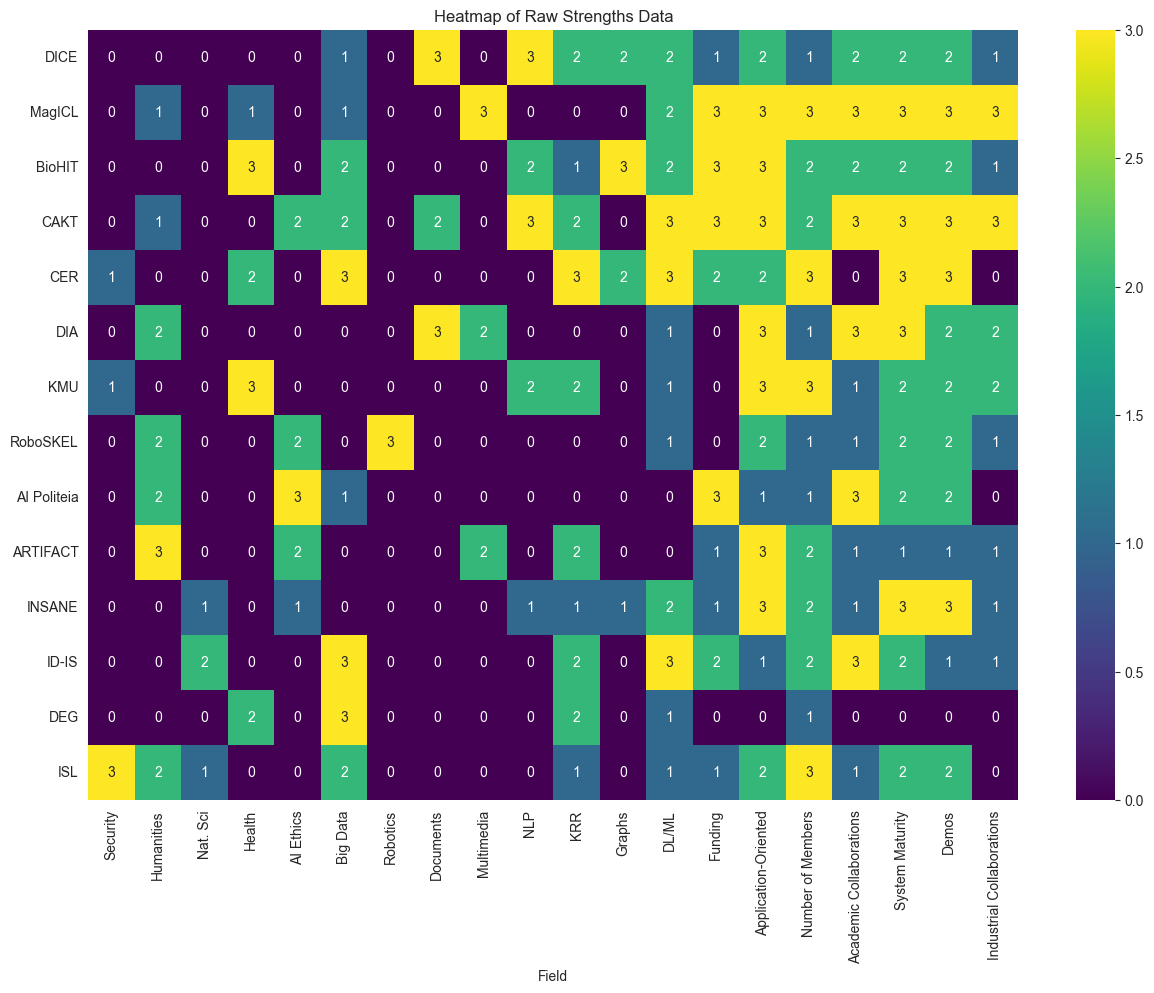

In [93]:
plt.figure(figsize=(15, 10))
sns.heatmap(df, annot=True, cmap='viridis')
plt.title('Heatmap of Raw Strengths Data')
plt.show()

In [23]:
industry_scores = calculate_pairwise_similarity(df)

complementary_scores = calculate_complementary_scores(df) #FIXME

combined_scores = combine_scores(industry_scores,complementary_scores, alpha=0.5)

Shape of the filtered data: (14, 6)


In [20]:
def similarity_visual(scores):
    """
    Visualizes the clustering results based on the similarity scores.
    
    Parameters:
    - scores (ndarray): A 2D NumPy array representing the combined similarity scores between teams.
    
    This function applies clustering, calculates cluster averages, identifies common strengths,
    and visualizes the results using heatmaps.
    """
    
    
    #num_clusters = 5: Define the number of clusters
    optimal_clusters = plot_elbow_method(scores)
    labels_ind = apply_clustering(scores, optimal_clusters)
    df['cluster'] = labels_ind  # Ensure df is the preprocessed DataFrame
  
    cluster_averages = calculate_cluster_averages(df, labels_ind)
    
    common_strengths = identify_common_strengths(cluster_averages)
    

    print("Cluster Average Ratings:")
    print(cluster_averages)
    
    print("Common Strengths in Clusters:")
    print(common_strengths)
    
    common_strengths_t = common_strengths.T
    
    # Plot common strengths
    plt.figure(figsize=(15, 8))
    sns.heatmap(common_strengths_t, annot=True, cmap='coolwarm', cbar=False)
    plt.title('Common Strengths in Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Feature')
    plt.show()
    
    # Plot heatmap of cluster averages
    plt.figure(figsize=(15, 10))
    sns.heatmap(cluster_averages, annot=True, cmap='viridis')
    plt.title('Heatmap of Cluster Averages')
    plt.show()


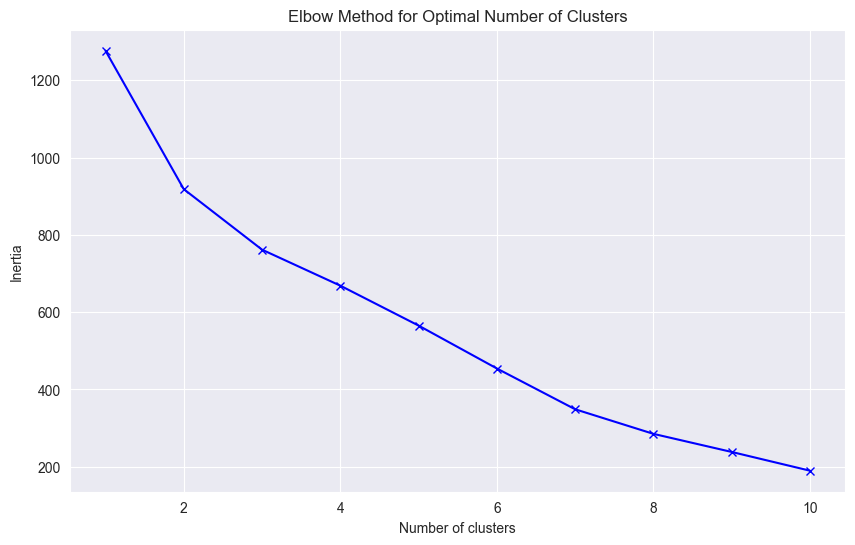

Cluster Average Ratings:
Field    Security  Humanities  Nat. Sci  Health  AI Ethics  Big Data  \
cluster                                                                
0           0.000       1.000     0.250    0.25       0.75     0.750   
1           0.000       0.000     0.000    2.00       0.00     3.000   
2           0.625       0.875     0.375    1.00       0.50     1.375   
3           0.000       2.000     0.000    0.00       3.00     1.000   

Field    Robotics  Documents  Multimedia    NLP    KRR  Graphs  DL/ML  \
cluster                                                                 
0           0.000      1.250        1.25  1.000  0.750   0.250  2.000   
1           0.000      0.000        0.00  0.000  2.000   0.000  1.000   
2           0.375      0.375        0.25  0.875  1.625   0.875  1.625   
3           0.000      0.000        0.00  0.000  0.000   0.000  0.000   

Field    Funding  Application-Oriented  Number of Members  \
cluster                                   

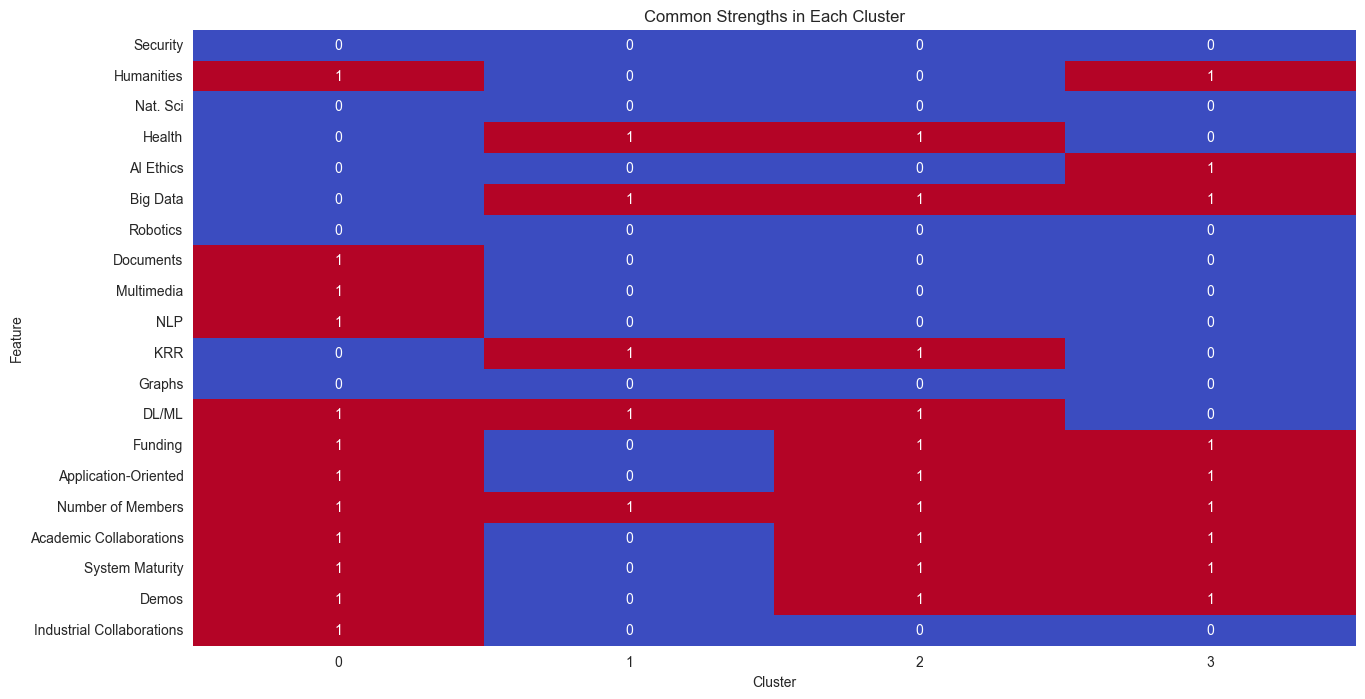

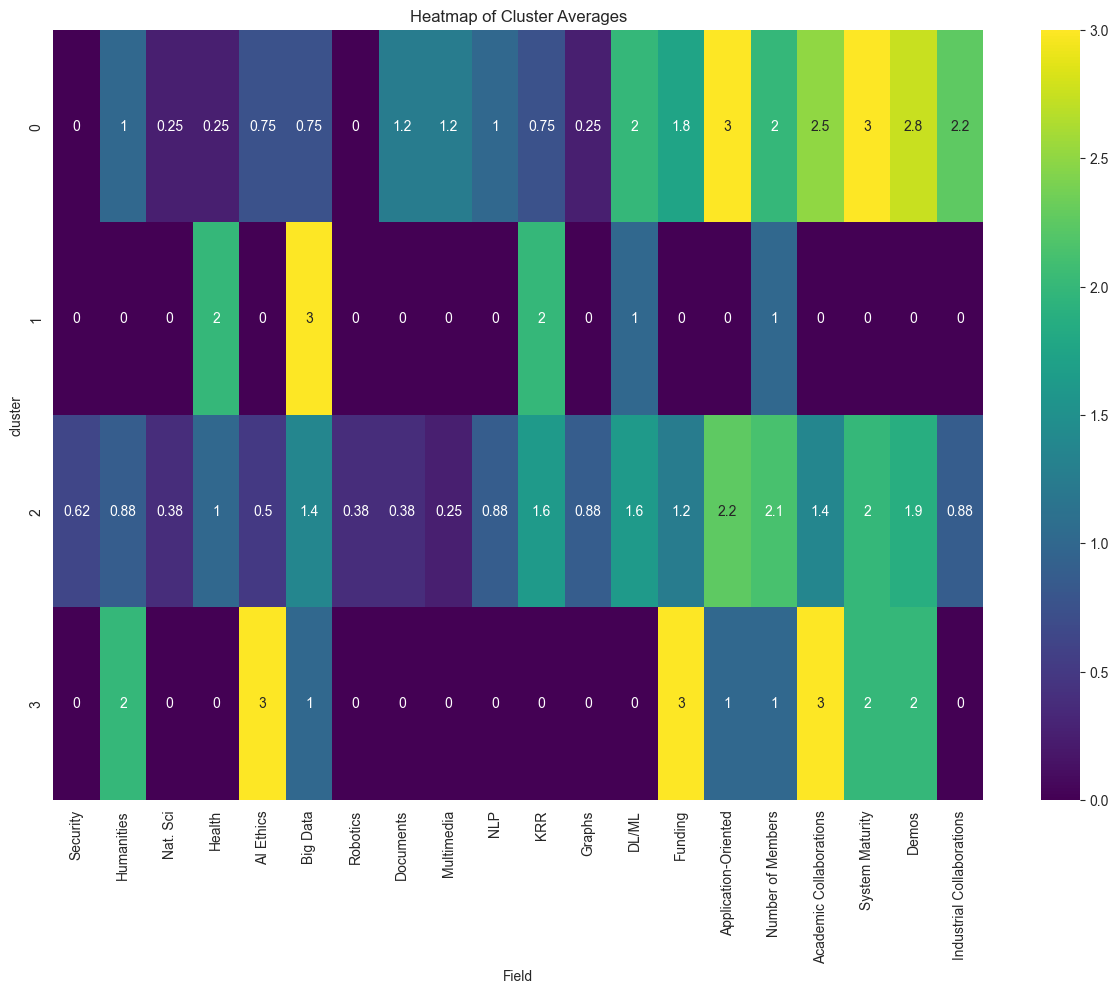

In [98]:
similarity_visual(combined_scores)

In [142]:
# Generate profiles for each cluster
def profile_clusters(df):
    """
    Generates statistical profiles for each cluster.

    This function groups the DataFrame by the 'cluster' column and calculates
    the mean, standard deviation, minimum, and maximum for each feature within
    each cluster.

    Parameters:
    - df (DataFrame): The DataFrame containing the team data, including a 'cluster' column.

    Returns:
    - profiles (DataFrame): A DataFrame with the mean, standard deviation, minimum, and maximum
                            values for each feature within each cluster.
    """
    
    profiles = df.groupby('cluster').agg(['mean', 'std', 'min', 'max'])
    return profiles

cluster_profiles = profile_clusters(df)
print("Cluster Profiles:")
print(cluster_profiles)

KeyError: 'cluster'

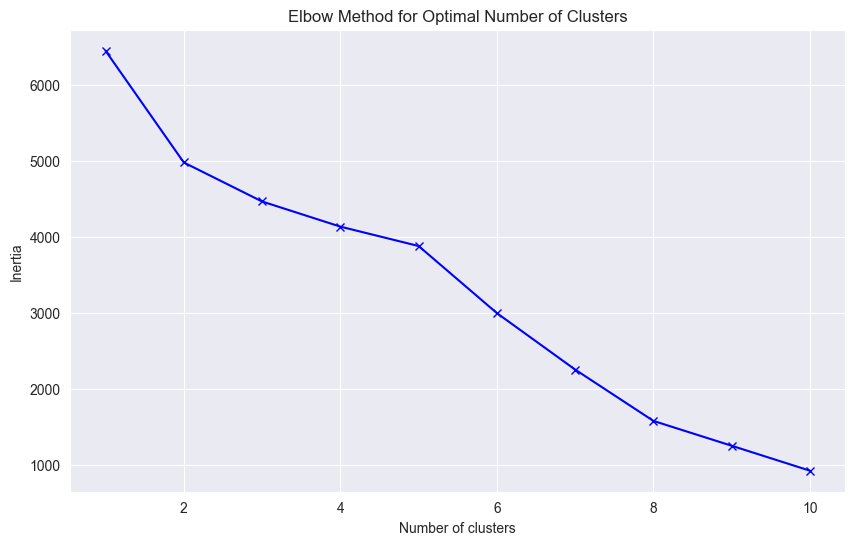

In [100]:
# Clustering using only industry similarity
num_clusters = plot_elbow_method(industry_scores)
industry_labels = apply_clustering(industry_scores, num_clusters)
df['industry_cluster'] = industry_labels

# Clustering using only complementary scores
complementary_labels = apply_clustering(complementary_scores, num_clusters)
df['complementary_cluster'] = complementary_labels

# Calculate and compare cluster averages for different methods
industry_cluster_averages = calculate_cluster_averages(df, industry_labels)
complementary_cluster_averages = calculate_cluster_averages(df, complementary_labels)

In [101]:
print("Industry-based Cluster Averages:")
print(industry_cluster_averages)

print("Complementary-based Cluster Averages:")
print(complementary_cluster_averages)


Industry-based Cluster Averages:
Field    Security  Humanities  Nat. Sci  Health  AI Ethics  Big Data  \
cluster                                                                
0        0.000000    2.000000  0.000000     0.0   1.000000  0.000000   
1        0.555556    0.777778  0.333333     1.0   0.444444  1.555556   
2        0.000000    0.000000  1.000000     0.0   1.000000  0.000000   
3        0.000000    2.000000  0.000000     0.0   3.000000  1.000000   
4        0.000000    0.000000  0.000000     2.0   0.000000  3.000000   

Field    Robotics  Documents  Multimedia       NLP  ...     DL/ML   Funding  \
cluster                                             ...                       
0             1.5   1.500000    1.000000  0.000000  ...  1.000000  0.000000   
1             0.0   0.555556    0.555556  1.111111  ...  1.888889  1.777778   
2             0.0   0.000000    0.000000  1.000000  ...  2.000000  1.000000   
3             0.0   0.000000    0.000000  0.000000  ...  0.000000  

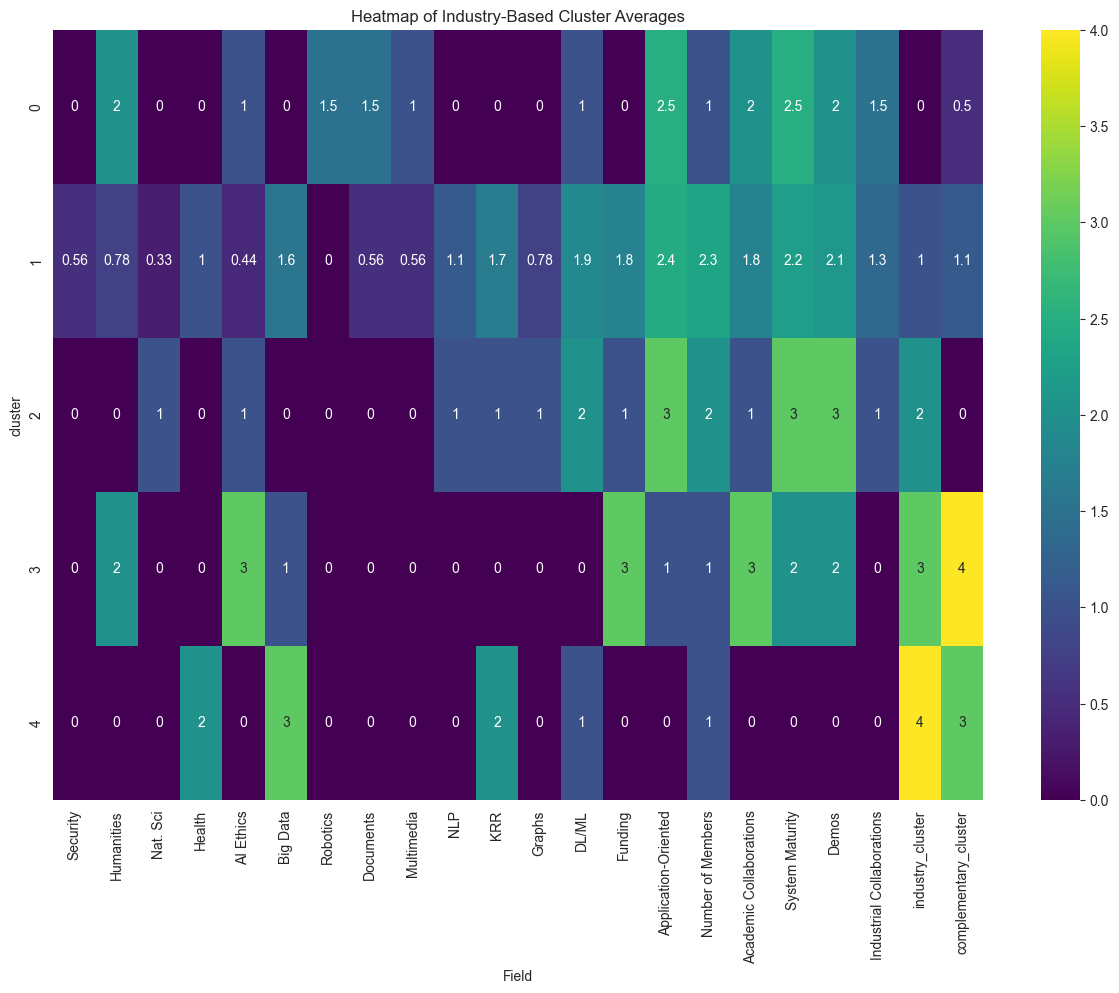

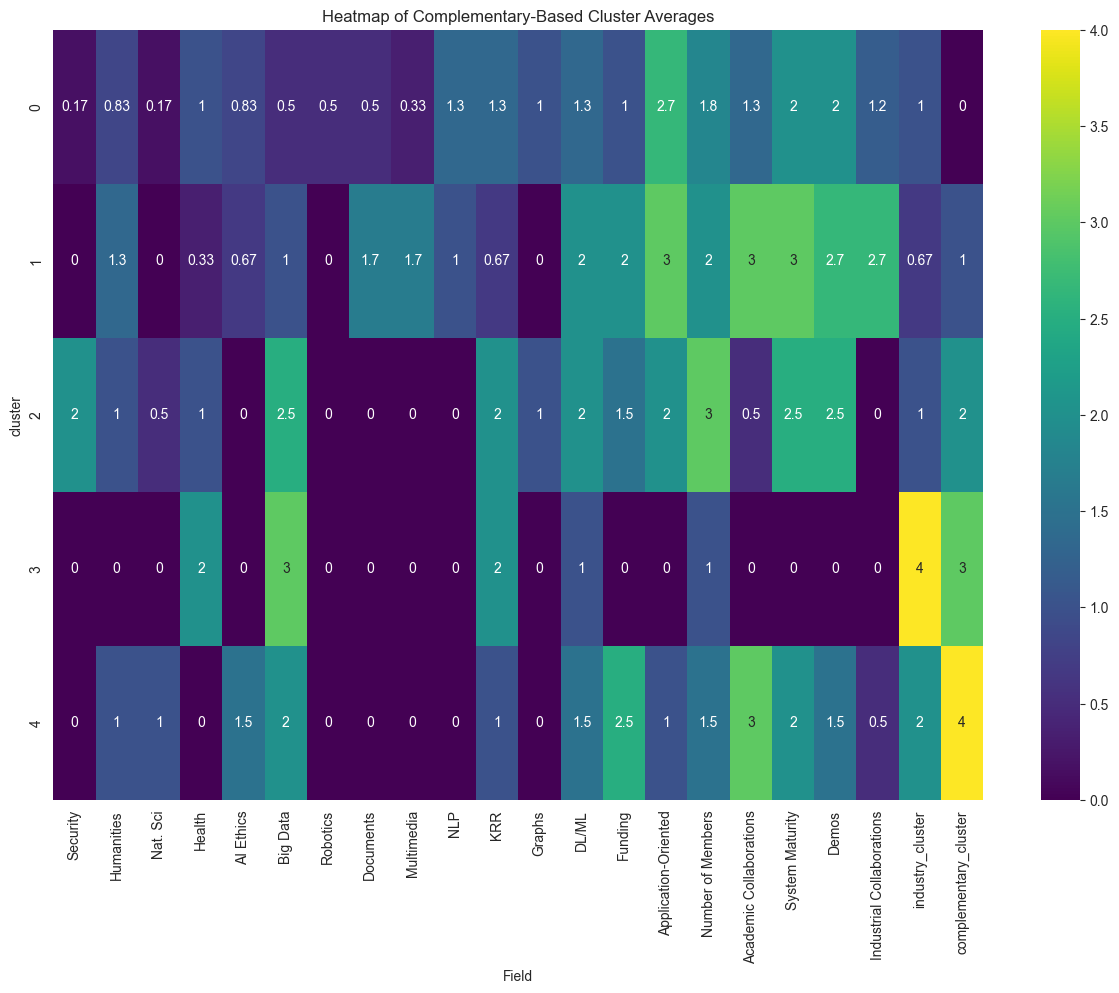

In [102]:
# Visualization of industry-based cluster averages
plt.figure(figsize=(15, 10))
sns.heatmap(industry_cluster_averages, annot=True, cmap='viridis')
plt.title('Heatmap of Industry-Based Cluster Averages')
plt.show()

# Visualization of complementary-based cluster averages
plt.figure(figsize=(15, 10))
sns.heatmap(complementary_cluster_averages, annot=True, cmap='viridis')
plt.title('Heatmap of Complementary-Based Cluster Averages')
plt.show()

In [129]:
# Compare common strengths
industry_common_strengths = identify_common_strengths(industry_cluster_averages)
complementary_common_strengths = identify_common_strengths(complementary_cluster_averages)

print("Industry-based Common Strengths:")
print(industry_common_strengths)

print("Complementary-based Common Strengths:")
print(complementary_common_strengths)

Industry-based Common Strengths:
Field    Security  Humanities  Nat. Sci  Health  AI Ethics  Big Data  \
cluster                                                                
0           False        True     False   False       True     False   
1           False       False     False    True      False      True   
2           False       False      True   False       True     False   
3           False        True     False   False       True      True   
4           False       False     False    True      False      True   

Field    Robotics  Documents  Multimedia    NLP  ...  DL/ML  Funding  \
cluster                                          ...                   
0            True       True        True  False  ...   True    False   
1           False      False       False   True  ...   True     True   
2           False      False       False   True  ...   True     True   
3           False      False       False  False  ...  False     True   
4           False      False  

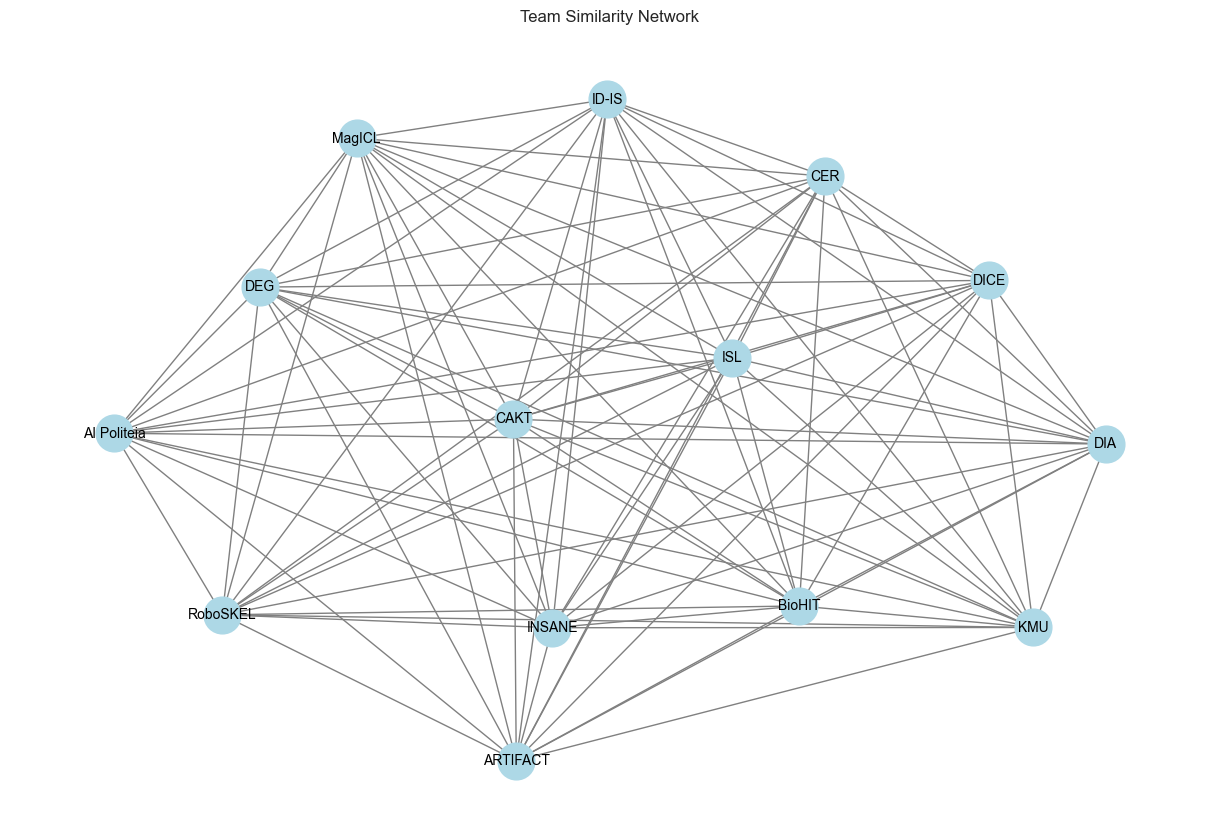

In [64]:
#Network Analysis
    #Nodes---> Team
    #Edges--->Similarities/Potential merges

import networkx as nx

import matplotlib.pyplot as plt

"""
    Plots a network graph representing the similarity between teams.

    This function creates a network graph where each node represents a team, and each edge
    represents the similarity between two teams. Only edges with positive similarity values
    are included.

    Parameters:
    - df (DataFrame): The DataFrame containing the team data. The index should contain team names.
    - similarity_matrix (ndarray): A 2D NumPy array representing the pairwise similarity scores between teams.

    Returns:
    - None
    """

def plot_team_network(df, similarity_matrix):
    G = nx.Graph()
    
    # Add nodes
    for team in df.index:
        G.add_node(team)
    
    # Add edges
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            if similarity_matrix[i, j] > 0:  # Only add edges with positive similarity
                G.add_edge(df.index[i], df.index[j], weight=similarity_matrix[i, j])
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, edge_color='gray')
    plt.title('Team Similarity Network')
    plt.show()

# Main execution for network analysis
plot_team_network(df, industry_scores)


In [21]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClusterMixin

Perform Complementary Weight Optimization and GridSearch to indentify the best model. For the best model, train to evaluate accuracy
-Generate artificial dataset to evaluate model performance.

In [28]:
"""""
    Train a supervised learning model
    
    After clustering, assign cluster labels as initial labels to the data.
    Use labels to train a supervised learning model (Random Forrest Classifier) to predict these labels on new data
 """
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [29]:
n_clusters = 5
labels = apply_clustering(combined_scores, n_clusters)
df['Cluster'] = labels

# Split data for supervised learning
X = df.drop(columns=['Cluster'])
y = df['Cluster']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter optimization using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Train RandomForest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate model
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

y_pred = rf.predict(X_test)

print(f"Train Accuracy: {train_score}")
print(f"Test Accuracy: {test_score}")

Train Accuracy: 1.0
Test Accuracy: 1.0


In [31]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Users/kimonanagnostopoulos/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [32]:
best_rf = grid_search.best_estimator_

In [35]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_test, y_test)

print(f"Optimized Train Accuracy: {train_score}")
print(f"Optimized Test Accuracy: {test_score}")
print("Optimized Classification Report:\n", classification_report(y_test, y_pred))
print("Optimized Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Optimized Train Accuracy: 1.0
Optimized Test Accuracy: 1.0
Optimized Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Optimized Confusion Matrix:
 [[3]]


/Users/kimonanagnostopoulos/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [37]:
combined_scores.shape

(14, 14)

In [38]:
print(rf.feature_importances_)

[0.03411664 0.03302334 0.03131553 0.02846394 0.04769832 0.05961394
 0.00515911 0.05337487 0.02548985 0.03857884 0.03222164 0.03058819
 0.04195707 0.05701597 0.08380838 0.03775932 0.12043434 0.08779395
 0.0672057  0.08438105]


In [39]:
from sklearn.utils import resample

def generate_artificial_data(data, num_samples=1000):
    artificial_d = resample(data, n_samples=num_samples, random_state=42, replace=True)
    return artificial_d

In [40]:
artificial_data = generate_artificial_data(df)
artificial_X = artificial_data.drop(columns=['Cluster'])

# Predict clusters for the artificial dataset
artificial_data['Predicted_Cluster'] = rf.predict(artificial_X)
print(artificial_data.head())

Field     Security  Humanities  Nat. Sci  Health  AI Ethics  Big Data  \
KMU            1.0         0.0       0.0     3.0        0.0       0.0   
CAKT           0.0         1.0       0.0     0.0        2.0       2.0   
DEG            0.0         0.0       0.0     2.0        0.0       3.0   
INSANE         0.0         0.0       1.0     0.0        1.0       0.0   
RoboSKEL       0.0         2.0       0.0     0.0        2.0       0.0   

Field     Robotics  Documents  Multimedia  NLP  ...  DL/ML  Funding  \
KMU            0.0        0.0         0.0  2.0  ...    1.0      0.0   
CAKT           0.0        2.0         0.0  3.0  ...    3.0      3.0   
DEG            0.0        0.0         0.0  0.0  ...    1.0      0.0   
INSANE         0.0        0.0         0.0  1.0  ...    2.0      1.0   
RoboSKEL       3.0        0.0         0.0  0.0  ...    1.0      0.0   

Field     Application-Oriented  Number of Members  Academic Collaborations  \
KMU                        3.0                  3       

In [41]:
# Predict clusters for the artificial dataset
artificial_data['Predicted_Cluster'] = best_rf.predict(artificial_X)

# Evaluate predictions on artificial data
print("Artificial Data Classification Report:\n", classification_report(artificial_data['Cluster'], artificial_data['Predicted_Cluster']))
print("Artificial Data Confusion Matrix:\n", confusion_matrix(artificial_data['Cluster'], artificial_data['Predicted_Cluster']))

Artificial Data Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       625
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00       188
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00        51

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Artificial Data Confusion Matrix:
 [[625   0   0   0   0]
 [  0  69   0   0   0]
 [  0   0 188   0   0]
 [  0   0   0  67   0]
 [  0   0   0   0  51]]


In [42]:
from sklearn.metrics import silhouette_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

In [43]:
# Evaluate predictions on artificial data
print("Artificial Data Classification Report:\n", classification_report(artificial_data['Cluster'], artificial_data['Predicted_Cluster']))
print("Artificial Data Confusion Matrix:\n", confusion_matrix(artificial_data['Cluster'], artificial_data['Predicted_Cluster']))

Artificial Data Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       625
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00       188
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00        51

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Artificial Data Confusion Matrix:
 [[625   0   0   0   0]
 [  0  69   0   0   0]
 [  0   0 188   0   0]
 [  0   0   0  67   0]
 [  0   0   0   0  51]]


In [44]:
from sklearn.model_selection import cross_val_score

# Evaluate model using cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")


Cross-Validation Scores: [1.         0.66666667 0.66666667 0.66666667 0.5       ]
Mean CV Score: 0.7


/Users/kimonanagnostopoulos/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
